# QuantumSim - Qubit Measurement
Author: Nico Kuijpers<br>
Date: December 23, 2024

In this notebook it is explained how the measurement of a single qubit is implemented in QuantumSim.

In [1]:
from quantumsim import *

## Introduction
For some cases such as error correction and quantum teleportation, it must be possible to measure the state of a single qubit $q$ and change the quantum state of the circuit accordingly. This is achieved by first obtaining the probabilities of measurement outcome $|0\rangle$ or $|1\rangle$ for qubit $q$ and then letting collapse its state to either $|0\rangle$ or $|1\rangle$ depending on a random number between $0$ and $1$.

The probabilities $p_0$ and $p_1$ representing the probalitiy that a measurment results in $|0\rangle$ or $|1\rangle$, respectively, are defined by

$p_0 = \langle \psi | P_0 | \psi\rangle$ and $p_1 = \langle \psi | P_1 | \psi\rangle$,

where $\psi$ is the quantum state of the circuit and $P_0$ and $P_1$ are projection operators.

For a two-qubit system of which the first qubit is to be measured, $P_0$ and $P_1$ are defined by

$P_0 = |0\rangle \langle 0| \otimes \mathbf{I}$ and $P_1 = |1\rangle \langle 1| \otimes \mathbf{I}$,

where $\mathbf{I}$ is the identity operator defined by

$\mathbf{I} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$.

If, for example, the second qubit of a circuit of 4 qubits needs to be measured, $P_0$ and $P_1$ are defined by

$P_0 = \mathbf{I} \otimes |0\rangle \langle 0| \otimes \mathbf{I} \otimes \mathbf{I}$ and
$P_1 = \mathbf{I} \otimes |1\rangle \langle 1| \otimes \mathbf{I} \otimes \mathbf{I}$.

After determining the new quantum state of qubit $q$, the new quantum state $|\psi'\rangle$ of the circuit is defined as follows.

If the state of qubit $q$ becomes $|0\rangle$, then

$|\psi'\rangle = \frac{P_0 |\psi\rangle}{\sqrt{p_0}}$.

If the state of qubit $q$ becomes $|1\rangle$, then

$|\psi'\rangle = \frac{P_1 |\psi\rangle}{\sqrt{p_1}}$.

To implement this approach in QuantumSim, class *StateVector* has been extended with a method *measure_qubit()* as defined below.

In [2]:
"""
Class representing the quantum state of a quantum circuit of N qubits.
"""
class StateVector:
    def measure_qubit(self, q):
        identity = QubitUnitaryOperation.get_identity()
        ket_bra_00 = Dirac.ket_bra(2,0,0)
        ket_bra_11 = Dirac.ket_bra(2,1,1)
        P0 = np.eye(1,1)
        P1 = np.eye(1,1)
        for i in range(self.N):
            if i == q:
                P0 = np.kron(P0, ket_bra_00)
                P1 = np.kron(P1, ket_bra_11)
            else:
                P0 = np.kron(P0, identity)
                P1 = np.kron(P1, identity)
        prob_0 = np.vdot(self.state_vector, P0.dot(self.state_vector)).real
        prob_1 = np.vdot(self.state_vector, P1.dot(self.state_vector)).real
        r = np.random.random()
        if r <= prob_0:
            self.state_vector = np.dot(P0,self.state_vector)/np.sqrt(prob_0)
        else:
            self.state_vector = np.dot(P1,self.state_vector)/np.sqrt(prob_1)

## Example: Bell state
Below, a circuit of 2 qubits is defined to create the $|\phi^{+}\rangle$ Bell state defined by

$|\phi^{+}\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$.

After establishing the Bell state, the two qubits are measured. Upon measuring the state of qubit 0, also the state of qubit 1 is determined.

Intermediate probabilities are shown using function *QuantumUtil.show_all_probabilities()*. 
It can be observed that measuring the state of qubit 0 also determines the state of qubit 1.

Measured state |11>


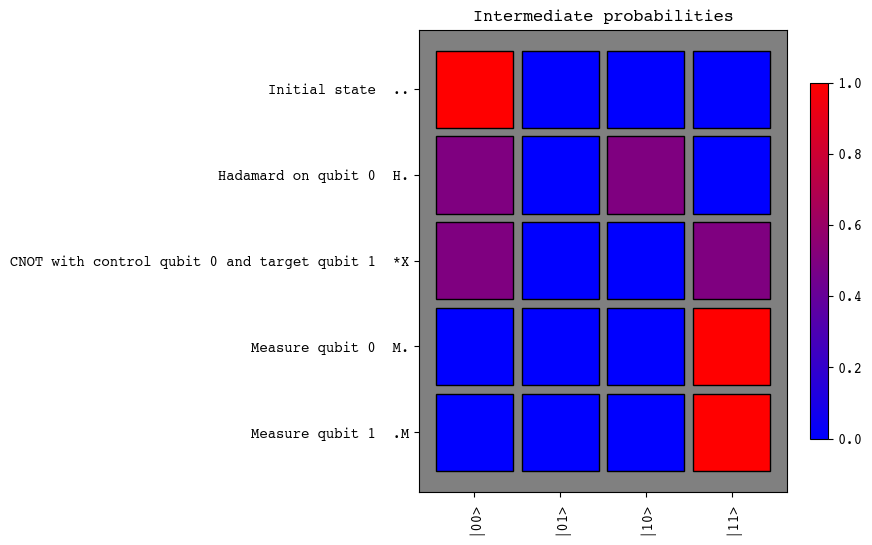

In [3]:
circuit = Circuit(2)
circuit.hadamard(0)
circuit.cnot(0,1)
circuit.measure_qubit(0)
circuit.measure_qubit(1)
circuit.execute()
circuit.measure()
state_as_string = circuit.get_classical_state_as_string()
print(f'Measured state {state_as_string}')
QuantumUtil.show_all_probabilities(circuit)


Run the code block above multiple times and confirm that the states after measuring qubit 0 are either $|00\rangle$ or $|11\rangle$ and remain unchanged when qubit 1 is measured.

Now, we run this circuit 1000 times using method *QuantumUtil.run_circuit()*. A histogram showing the occurrences of measured classical states is then created by calling method *QuantumUtil.histogram_of_classical_states()*. The states $|00\rangle$ and $|11\rangle$ should each occur about 500 times.

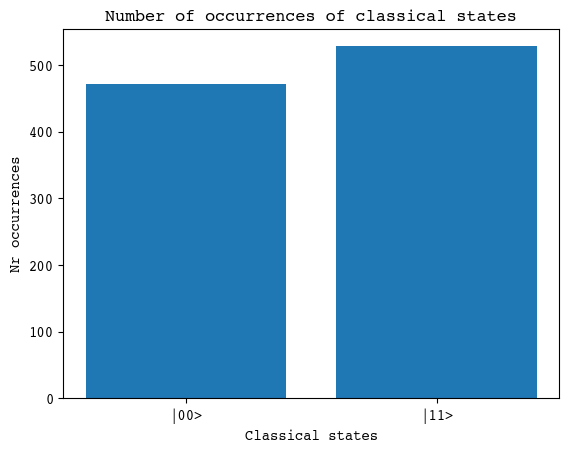

In [4]:
result = QuantumUtil.run_circuit(circuit, nr_runs=1000)
QuantumUtil.histogram_of_classical_states(result)

## Example: Greenberger-Horne-Zeilinger state
The Greenberger-Horne-Zeilinger (GHZ) state is an entangled quantum state involving 3 or more qubits. The GHZ state for 3 qubits is defined by

$|\text{GHZ}\rangle = \frac{|000\rangle + |111\rangle}{\sqrt{2}}$

Below a circuit of 3 qubits is defined to create a GHZ state. 
After establishing the GHZ state, qubit 1 is measured. Upon measuring the state of qubit 1, also the state of the other qubits is determined.

As before, intermediate probabilities are shown. Run the code block below multiple times to confirm that measuring qubit 1 determines the final state to be either $|000\rangle$ or $|111\rangle$.

Measured state |111>


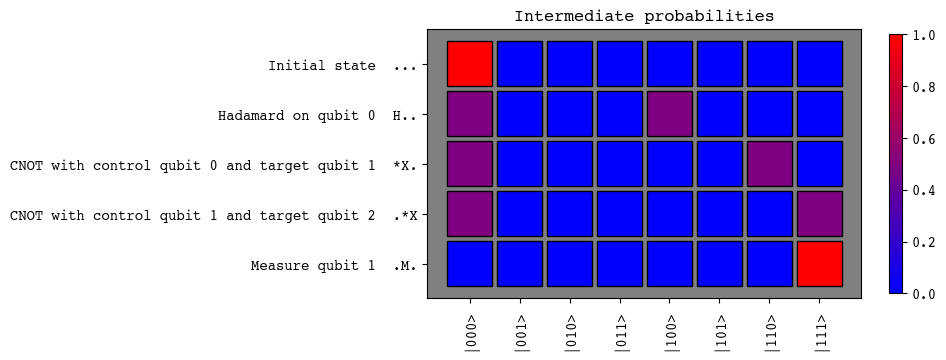

In [5]:
circuit = Circuit(3)
circuit.hadamard(0)
circuit.cnot(0,1)
circuit.cnot(1,2)
circuit.measure_qubit(1)
circuit.execute()
circuit.measure()
state_as_string = circuit.get_classical_state_as_string()
print(f'Measured state {state_as_string}')
QuantumUtil.show_all_probabilities(circuit)


Now, we run this circuit 1000 times and create a histogram showing the occurrences of measured classical states. 
The states $|000\rangle$ and $|111\rangle$ should each occur about 500 times.

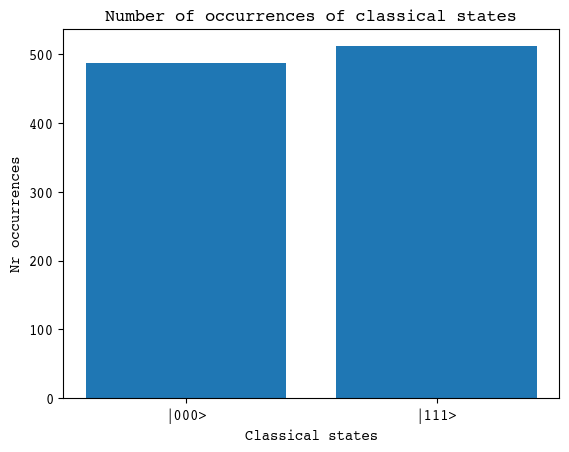

In [6]:
result = QuantumUtil.run_circuit(circuit, nr_runs=1000)
QuantumUtil.histogram_of_classical_states(result)